### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [1]:
lista_alumnos = [["Pedro", 47, 1.80],
                 ["Tomás", 31, 1.80],
                 ["Ana", 39, 1.65],
                 ["Natalio", 29, 1.73],
                 ["Monica", 47, 1.73],
                 ["Jose", 24, 1.75],
                 ["Carolina", 34, 1.64],
                 ["Alberto", 36, 1.60],
                 ["Cristina", 46, 1.70],
                 ["Alba", 29, 1.68],
                 ["Laura", 40, 1.60],
                 ["Luis", 47, 1.69],
                 ["Jaime", 38, 1.60],
                 ["Fernando", 51, 1.75]]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
# df
df = pd.DataFrame(lista_alumnos, columns = ["Nombre", "Edad", "Altura"])
df.head()


,Nombre,Edad,Altura
0,Pedro,47,1.80
1,Tomás,31,1.80
2,Ana,39,1.65
3,Natalio,29,1.73
4,Monica,47,1.73


In [4]:
edad = [     e[1] for e in lista_alumnos    ]
altura = [e[2] for e in lista_alumnos]
print(edad)
print(altura)

[47, 31, 39, 29, 47, 24, 34, 36, 46, 29, 40, 47, 38, 51]
[1.8, 1.8, 1.65, 1.73, 1.73, 1.75, 1.64, 1.6, 1.7, 1.68, 1.6, 1.69, 1.6, 1.75]


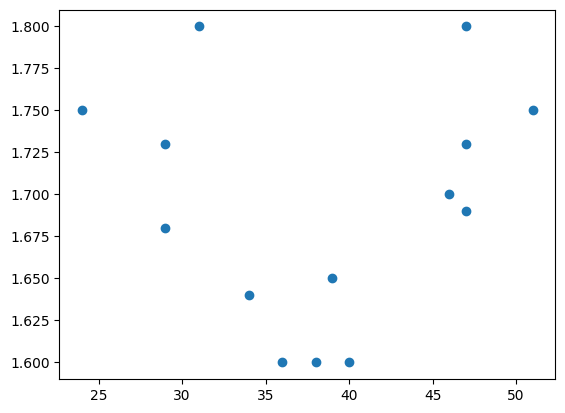

In [5]:
plt.scatter(edad, altura)

In [34]:
# Obtener X_train, X_test, y_train, y_test, semilla 42
X = df[['Edad']]
y = df['Altura']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33) 

In [29]:
print(X_train.shape)
print(X_test.shape)

(11, 1)
(3, 1)


In [35]:
# modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)
print(model.intercept_,model.coef_)

1.6690400374619527 [0.00038047]


Text(0.5, 0, 'Edad')

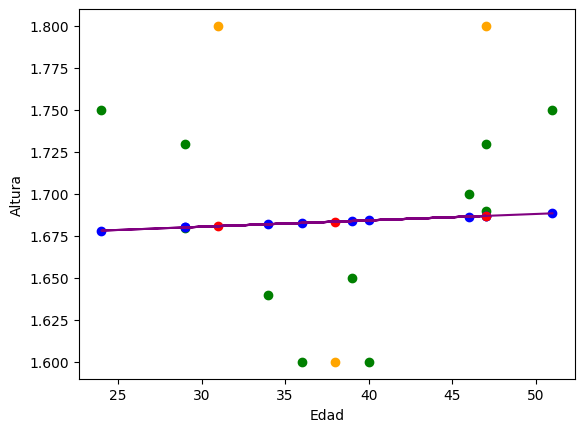

In [36]:
# dibujar la regresión lineal y los puntos con un diagrama de dispersión 
plt.scatter(X_train, y_train, color = 'green')
plt.scatter(X_test, y_test, color = 'orange')
plt.plot(X, model.predict(X), color = 'purple')
plt.scatter(X_train, model.predict(X_train), color = 'blue')
plt.scatter(X_test, model.predict(X_test), color = 'red')
plt.ylabel('Altura')
plt.xlabel('Edad')

In [37]:
X

,Edad
0,47
1,31
2,39
3,29
4,47
5,24
6,34
7,36
8,46
9,29


In [38]:
type(model.predict(X))

numpy.ndarray

In [39]:
model.predict(X)

array([1.68692227, 1.6808347 , 1.68387848, 1.68007375, 1.68692227,
       1.67817139, 1.68197612, 1.68273706, 1.68654179, 1.68007375,
       1.68425896, 1.68692227, 1.68349801, 1.68844416])

(14, 1)

In [40]:
model.predict(X).tolist()

[1.6869222664481387,
 1.6808346991336924,
 1.6838784827909155,
 1.6800737532193866,
 1.6869222664481387,
 1.6781713884336222,
 1.6819761180051511,
 1.6827370639194568,
 1.6865417934909857,
 1.6800737532193866,
 1.6842589557480685,
 1.6869222664481387,
 1.6834980098337626,
 1.6884441582767502]

In [42]:
lista_tot = []
for i in model.predict(X).tolist():
    lista_tot.append(i)
lista_tot


[1.6869222664481387,
 1.6808346991336924,
 1.6838784827909155,
 1.6800737532193866,
 1.6869222664481387,
 1.6781713884336222,
 1.6819761180051511,
 1.6827370639194568,
 1.6865417934909857,
 1.6800737532193866,
 1.6842589557480685,
 1.6869222664481387,
 1.6834980098337626,
 1.6884441582767502]

In [43]:
df['predicciones'] = lista_tot
df['residuos'] = df['Altura'] - df['predicciones']
df


,Nombre,Edad,Altura,predicciones,residuos
0,Pedro,47,1.80,1.686922,0.113078
1,Tomás,31,1.80,1.680835,0.119165
2,Ana,39,1.65,1.683878,-0.033878
3,Natalio,29,1.73,1.680074,0.049926
4,Monica,47,1.73,1.686922,0.043078
5,Jose,24,1.75,1.678171,0.071829
6,Carolina,34,1.64,1.681976,-0.041976
7,Alberto,36,1.60,1.682737,-0.082737
8,Cristina,46,1.70,1.686542,0.013458
9,Alba,29,1.68,1.680074,-0.000074


In [44]:
print('MSE:', mean_squared_error(y_test, model.predict(X_test)))
print('RMSE:', np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

MSE: 0.011319620133994157
RMSE: 0.1063937034508817


In [45]:
#df_corr
df_corr = df[['Edad', 'Altura']].corr()

<Axes: >

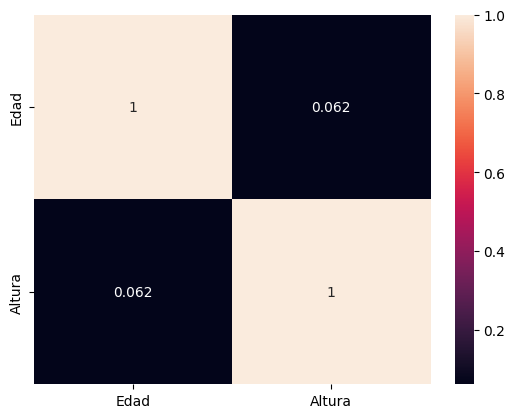

In [46]:
# heatmap
sns.heatmap(df_corr, annot=True)